# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Traffic Data.csv')
df.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [3]:
import pandas as pd

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
date_time               0
dtype: int64

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [6]:
df.isna().sum()

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
date_time               0
dtype: int64

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [7]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [8]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0
...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0


In [9]:
df.reset_index().set_index('traffic_volume')

,index,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
traffic_volume,,,,,,,,,
1209.0,0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN
1248.0,1,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
4602.0,2,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
2838.0,3,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
5794.0,4,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0
...,...,...,...,...,...,...,...,...,...
2723.0,19995,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0
5895.0,19996,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0
1132.0,19997,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0


In [10]:
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'])
df.set_index('date_time', inplace=True)
df.dropna(inplace=True)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [14]:
df.sort_index(inplace=True)
last_timestamp_2017 = df.loc['2018'].index.max() # Filter by year in the index
train_df = df.loc[df.index <= last_timestamp_2017]
test_df = df.loc[df.index > last_timestamp_2017]

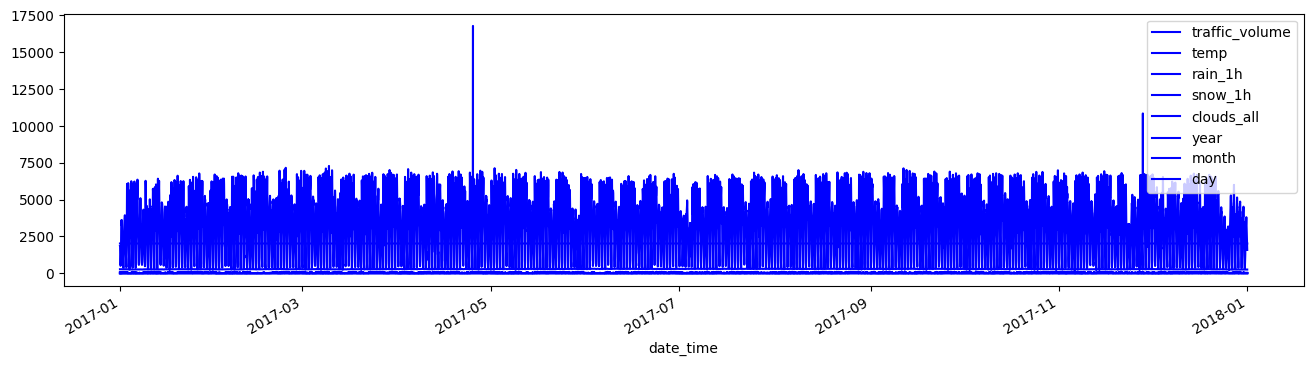

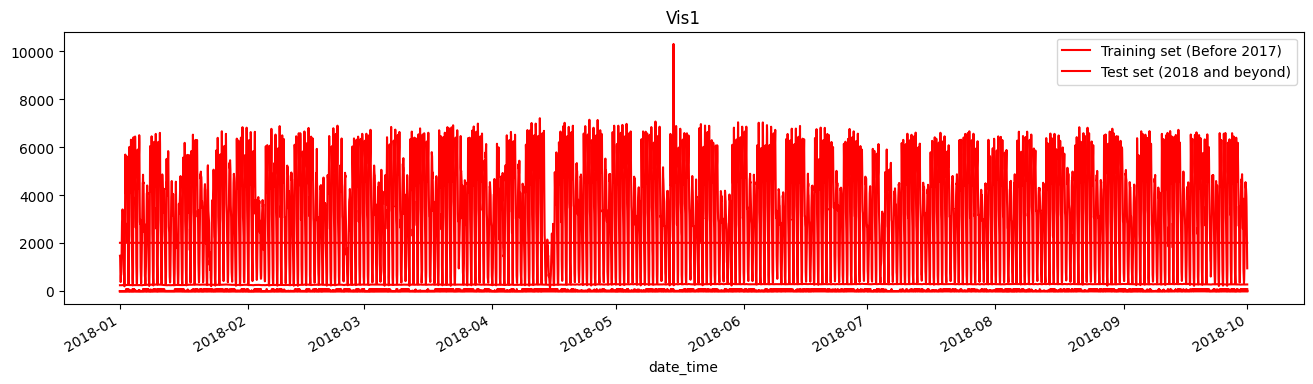

In [17]:
split_date = '2018-01-01'
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
train_data = df[:split_date].iloc[:,2:3].values
test_data = df[split_date:].iloc[:,2:3].values

# Create a boolean column indicating whether the data is in 2017
df["in_2017"] = df['year'] == 2017

df[df["in_2017"]][:'2017'].plot(figsize=(16,4),legend=True, color= 'blue')

# Assuming you want to plot data for 2018 in the next line, create a similar column
df["in_2018"] = df['year'] == 2018
df[df["in_2018"]]['2018':].plot(figsize=(16,4),legend=True, color = 'red')

plt.legend(['Training set (Before 2017)','Test set (2018 and beyond)'])
plt.title('Vis1')
plt.show()

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [19]:
import numpy as np
# Define the sequence length (number of past time steps)
n_past = 60

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
X_train.shape

(12005, 60)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, GRU

In [27]:
RNN_model = Sequential()

RNN_model.add(SimpleRNN(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
RNN_model.add(Dropout(0.2))

RNN_model.add(SimpleRNN(units=50, return_sequences = True))
RNN_model.add(Dropout(0.2))

RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dropout(0.2))

RNN_model.add(Dense(units = 1))
RNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 60, 50)            5050      
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [28]:
RNN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our RNN model
RNN_model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/20
376/376 [==============================] - 29s 67ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 2/20
376/376 [==============================] - 23s 61ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 3/20
376/376 [==============================] - 25s 65ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 4/20
376/376 [==============================] - 24s 64ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 5/20
376/376 [==============================] - 22s 59ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 6/20
376/376 [==============================] - 24s 65ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 7/20
376/376 [==============================] - 24s 65ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 8/20
376/376 [==============================] - 22s 59ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 9/20
376/376 [==============================] - 27s 71ms/step - loss: 0.0000e+00 - val_loss: 0.4808
Epoch 10/20
376/376 [=========================

In [31]:
train_predict=RNN_model.predict(X_train)
test_predict=RNN_model.predict(X_test)

247/247 [==============================] - 4s 14ms/step


In [32]:
import math
from sklearn.metrics import mean_squared_error

In [33]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0
0.693370805651701


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [35]:
# The LSTM architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
376/376 [==============================] - 62s 139ms/step - loss: 0.0000e+00
Epoch 2/20
376/376 [==============================] - 51s 136ms/step - loss: 0.0000e+00
Epoch 3/20
376/376 [==============================] - 52s 139ms/step - loss: 0.0000e+00
Epoch 4/20
376/376 [==============================] - 51s 134ms/step - loss: 0.0000e+00
Epoch 5/20
376/376 [==============================] - 53s 140ms/step - loss: 0.0000e+00
Epoch 6/20
376/376 [==============================] - 52s 139ms/step - loss: 0.0000e+00
Epoch 7/20
376/376 [==============================] - 51s 135ms/step - loss: 0.0000e+00
Epoch 8/20
376/376 [==============================] - 52s 139ms/step - loss: 0.0000e+00
Epoch 9/20
376/376 [==============================] - 51s 136ms/step - loss: 0.0000e+00
Epoch 10/20
376/376 [==============================] - 52s 138ms/step - loss: 0.0000e+00
Epoch 11/20
376/376 [==============================] - 53s 141ms/step - loss: 0.0000e+00
Epoch 12/20
376/376 [=========

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [36]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

247/247 [==============================] - 11s 44ms/step


In [37]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [38]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0
0.6361061237542242


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Ans 1/
n time series forecasting, normalization ( Min-Max scaling ) ensures that all features contribute equally to the model's learning process.And By normalizing the data, the model avoids bias towards features with larger scales and improves gradient-based optimization, making the learning process more stable.
if we Missing values can lead to incorrect model training or evaluation. Techniques like mean imputation, forward filling, or interpolation are used based on the nature of the missing data.
 the model has a complete dataset to learn from, avoiding potential biases or incorrect patterns due to incomplete data.

Ans 2 /
by models like LSTM  And  RNN  are often chosen because they are well-suited for capturing temporal dependencies.
These models can sequential data, which is essential for accurate forecasting.

Ans 3/
 to preprocess and extract features, LSTMs to handle the sequential nature of time series data, and Dense layers to refine the predictions. This combination leverages the strengths of each layer type to effectively model and forecast time series data, capturing both local and long-term patterns.

Ans 4/
in training the time series forecasting model, I initially chose a smaller batch size for better generalization, a moderate number of epochs to balance training and overfitting, and the Adam optimizer for its efficient gradient handling.  that smaller batches and the Adam optimizer provided a good balance between training speed and prediction accuracy.


Ans 5 /
For regression tasks in forecasting,  MSE or MAE is commonly used.
 The chosen loss function directly impacts how the model's performance is evaluated and guides the learning process.
 Metrics like RMSE  or MAPE provide insights into the accuracy of forecasts and can be more interpretable in different contexts.


Ans 6/
in tuning the hyperparameters allowed the model to perform better by finding the optimal balance between learning speed, capacity, and generalization.

Ans 7 /
For Overfitting Use regularization techniques, dropout layers, or reduce model complexity. Also, increasing training data or using early stopping can help.
 For Underfitting Increase model complexity, add more features, or improve feature engineering.

Ans 8 /
sing different algorithms, feature engineering techniques,
Algorithm Exploration,Feature Engineering,Hyperparameter Optimization,Model Ensembling,Cross-Validation
By addressing these aspects, you can build a robust forecasting model and continually enhance its performance through iterative improvements and optimizations.
